
*H_0*: rychlost je stejna -> ma stejny stred a ma stejny rozptyl u normalniho
rozdeleni (u_x = u_y)

*H_A*: rychlost X je mensi nez Y -> u_x < u_y



In [22]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
from scipy import stats
alpha = 0.05
plt.style.use('seaborn-whitegrid')

In [23]:
data = genfromtxt('data.csv', delimiter=",")

In [24]:
x_values = data[:,0]
y_values = data[:,1]

test for normal distribution

*H_0*: array `x_values` **comes** from normal distribution

*H_A*: array `x_values` **doesn't** come from normal distribution


In [25]:
stat, p = stats.kstest(x_values, "norm")
print(f"P-value = {p}")
if p < alpha:
    print(f"Rejecting H_0 with p value equal to {p:.9f}")
else:
    print("Not rejecting H_0 -> x_values comes from normal distribution")

P-value = 0.0
Rejecting H_0 with p value equal to 0.000000000


Nonparametric test

*H_0*: the distribution underlying sample `x_values` is the same as the distribution underlying sample `y_values`. In other words, network provider X is the same as Y.

*H_A*: the distribution underlying `x_values` is stochastically greater than the distribution underlying `y_values`. In other words, ping from the network provider X is greater than from Y.


In [26]:
stat, p_value = stats.mannwhitneyu(x_values, y_values, alternative="greater")
print(f"P-value = {p_value:.9f}")
if p_value < alpha:
    print(f"Rejecting H0")
else:
    print(f"Can't reject H0")


P-value = 0.987360260
Can't reject H0


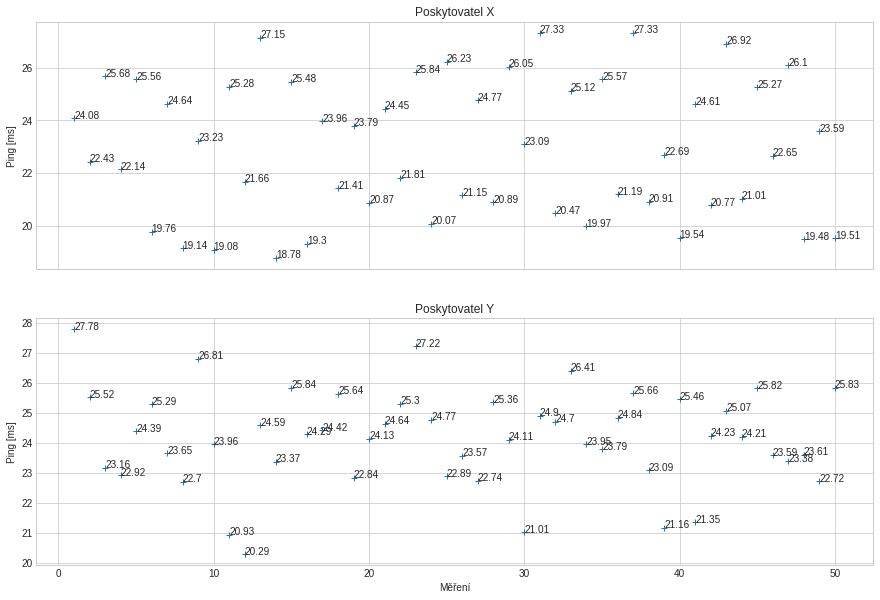

In [55]:
x_y_values = range(1, x_values.size + 1)
y_x_values = range(1, y_values.size + 1)
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(15,10), sharex=True)

ax0.plot(x_y_values, x_values, '+')
ax0.title.set_text("Poskytovatel X")

ax1.plot(y_x_values, y_values, '+')
ax1.title.set_text("Poskytovatel Y")

for i, txt in enumerate(x_values):
    ax0.annotate(txt, (x_y_values[i], x_values[i]))

for i, txt in enumerate(y_values):
    ax1.annotate(txt, (y_x_values[i], y_values[i]))

ax1.set_xlabel("Měření")

ax0.set_ylabel("Ping [ms]")
ax1.set_ylabel("Ping [ms]")

plt.savefig("values.pdf", bbox_inches='tight')
